# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [2]:
df = pd.read_csv("REVENUE.csv")

In [3]:
df.head()

,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,day_type,room_class,successful_bookings,capacity
0,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,25,30
1,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,28,30
2,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,23,30
3,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,13,19
4,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,18,19


In [4]:
df.shape

(536709, 19)

In [5]:
df.columns

Index(['booking_date', 'check_in_date', 'checkout_date', 'no_guests',
       'room_category', 'booking_platform', 'ratings_given', 'booking_status',
       'revenue_generated', 'revenue_realized', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'day_type', 'room_class',
       'successful_bookings', 'capacity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536709 entries, 0 to 536708
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   booking_date         536709 non-null  object 
 1   check_in_date        536709 non-null  object 
 2   checkout_date        536709 non-null  object 
 3   no_guests            536709 non-null  int64  
 4   room_category        536709 non-null  object 
 5   booking_platform     536709 non-null  object 
 6   ratings_given        226008 non-null  float64
 7   booking_status       536709 non-null  object 
 8   revenue_generated    536709 non-null  int64  
 9   revenue_realized     536709 non-null  int64  
 10  property_name        536709 non-null  object 
 11  category             536709 non-null  object 
 12  city                 536709 non-null  object 
 13  date                 536709 non-null  object 
 14  mmm yy               536709 non-null  object 
 15  day_type         

In [7]:
df.describe(include = 'object')

,booking_date,check_in_date,checkout_date,room_category,booking_platform,booking_status,property_name,category,city,date,mmm yy,day_type,room_class
count,536709,536709,536709,536709,536709,536709,536709,536709,536709,536709,536709,536709,536709
unique,116,92,97,4,7,3,7,2,4,363,12,2,4
top,08-06-2022,16-07-2022,09-05-2022,RT2,others,Checked Out,Atliq Palace,Luxury,Mumbai,01-03-2023,Mar-23,weekeday,Elite
freq,6680,8068,7360,197431,219553,376475,94204,333624,173306,2817,47666,337460,197431


In [8]:
df.isnull().sum()

booking_date                0
check_in_date               0
checkout_date               0
no_guests                   0
room_category               0
booking_platform            0
ratings_given          310701
booking_status              0
revenue_generated           0
revenue_realized            0
property_name               0
category                    0
city                        0
date                        0
mmm yy                      0
day_type                    0
room_class                  0
successful_bookings         0
capacity                    0
dtype: int64

In [9]:
df.drop(['ratings_given'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

booking_date           0
check_in_date          0
checkout_date          0
no_guests              0
room_category          0
booking_platform       0
booking_status         0
revenue_generated      0
revenue_realized       0
property_name          0
category               0
city                   0
date                   0
mmm yy                 0
day_type               0
room_class             0
successful_bookings    0
capacity               0
dtype: int64

In [11]:
df.describe()

,no_guests,revenue_generated,revenue_realized,successful_bookings,capacity
count,536709.000000,536709.000000,536709.000000,536709.000000,536709.000000
mean,2.036871,14916.153111,12696.031844,14.633567,25.281115
std,1.031699,6452.403918,6927.441564,7.593660,11.440152
min,1.000000,6500.000000,2600.000000,1.000000,3.000000
25%,1.000000,9900.000000,7600.000000,9.000000,18.000000
50%,2.000000,13500.000000,11700.000000,14.000000,25.000000
75%,2.000000,18000.000000,15300.000000,19.000000,34.000000
max,6.000000,45220.000000,45220.000000,43.000000,50.000000


# Data Analysis and Visualizations 

booking_status
Checked Out    0.701451
Cancelled      0.248336
No Show        0.050213
Name: proportion, dtype: float64


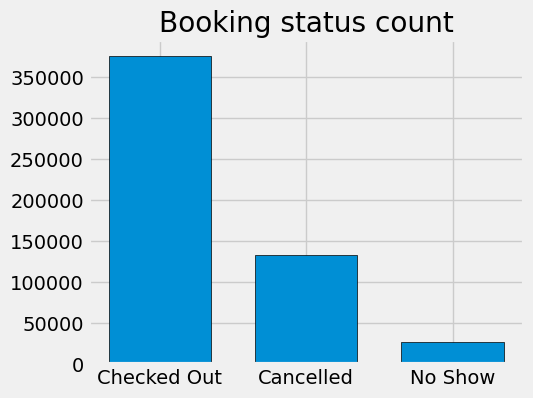

In [12]:
booking_perc = df['booking_status'].value_counts(normalize = True)
print(booking_perc)

plt.figure(figsize = (5,4))
plt.title('Booking status count')
plt.bar(['Checked Out', 'Cancelled', 'No Show'],df['booking_status'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

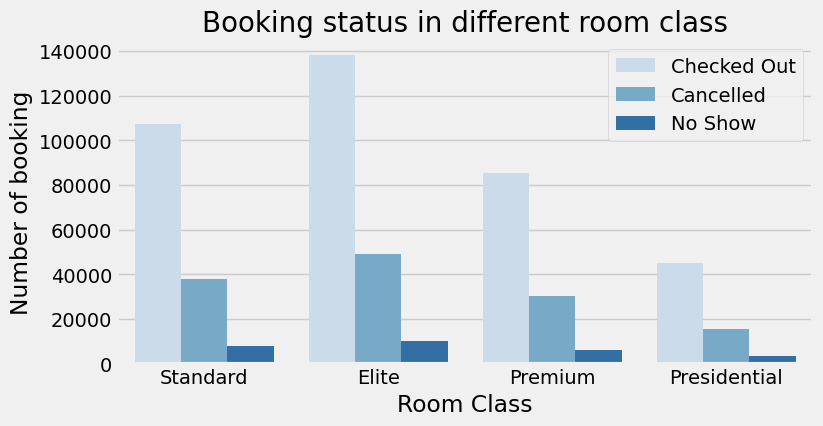

In [13]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'room_class', hue = 'booking_status', data = df, palette = 'Blues')
legend_labels,_= ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Booking status in different room class', size = 20)
plt.xlabel('Room Class')
plt.ylabel('Number of booking')
plt.legend(['Checked Out', 'Cancelled', 'No Show'])
plt.show()

In [14]:
standard_class = df[df['room_class'] == 'Standard']
standard_class['booking_status'].value_counts(normalize = True)

booking_status
Checked Out    0.701316
Cancelled      0.247966
No Show        0.050718
Name: proportion, dtype: float64

In [15]:
elite_class = df[df['room_class'] == 'Elite']
elite_class['booking_status'].value_counts(normalize = True)

booking_status
Checked Out    0.700022
Cancelled      0.249591
No Show        0.050387
Name: proportion, dtype: float64

In [16]:
premium_class = df[df['room_class'] == 'Premium']
premium_class['booking_status'].value_counts(normalize = True)

booking_status
Checked Out    0.701725
Cancelled      0.248827
No Show        0.049449
Name: proportion, dtype: float64

In [17]:
presidential_class = df[df['room_class'] == 'Presidential']
presidential_class['booking_status'].value_counts(normalize = True)

booking_status
Checked Out    0.705656
Cancelled      0.244418
No Show        0.049926
Name: proportion, dtype: float64

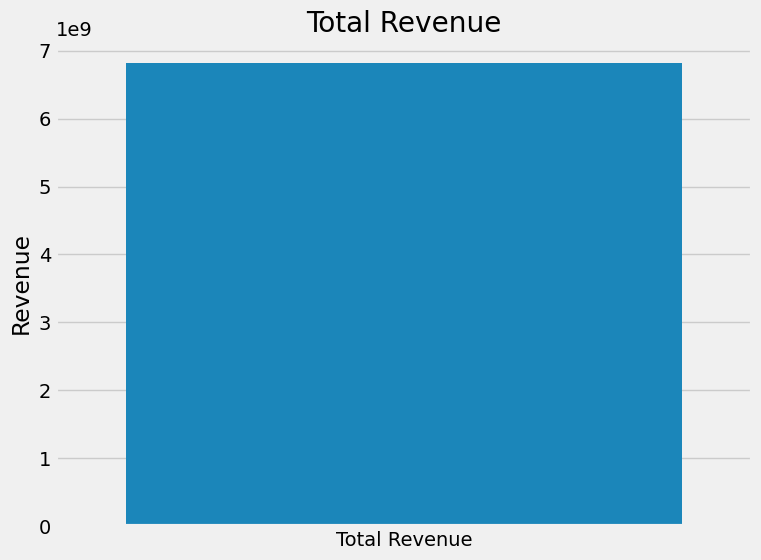

In [18]:
revenue = df['revenue_realized'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Total Revenue'], y=[revenue])
plt.ylabel('Revenue')
plt.title('Total Revenue')
plt.show()

In [19]:
revenue = df['revenue_realized'].sum()
revenue

6814074555

In [20]:
standard_class = standard_class.groupby('mmm yy')[['revenue_realized']].mean()
elite_class = elite_class.groupby('mmm yy')[['revenue_realized']].mean()
premium_class = premium_class.groupby('mmm yy')[['revenue_realized']].mean()
presidential_class = presidential_class.groupby('mmm yy')[['revenue_realized']].mean()

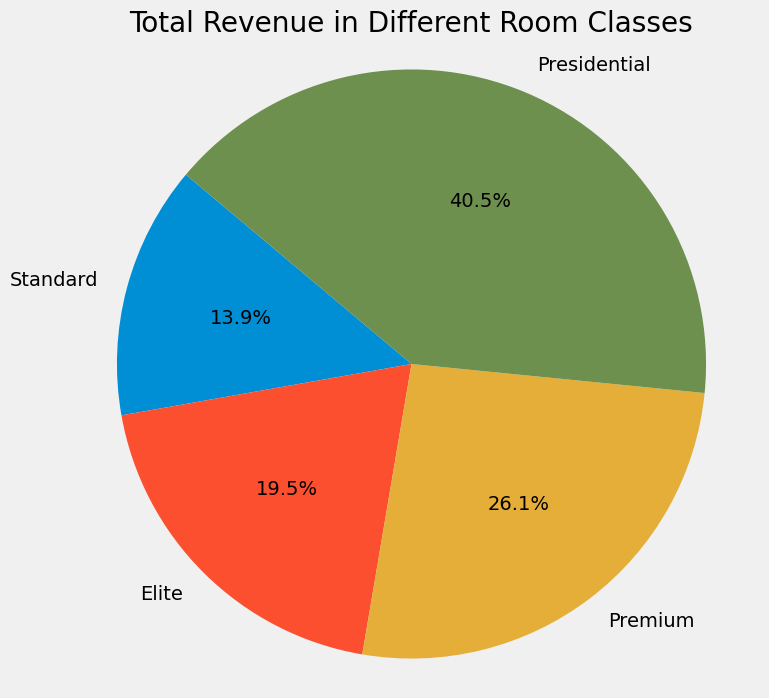

In [21]:
room_class = ['Standard', 'Elite', 'Premium', 'Presidential']
revenues = [standard_class['revenue_realized'].sum(),
            elite_class['revenue_realized'].sum(),
            premium_class['revenue_realized'].sum(),
            presidential_class['revenue_realized'].sum()]

plt.figure(figsize=(8, 8))
plt.pie(revenues, labels=room_class, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue in Different Room Classes')
plt.axis('equal')
plt.show()

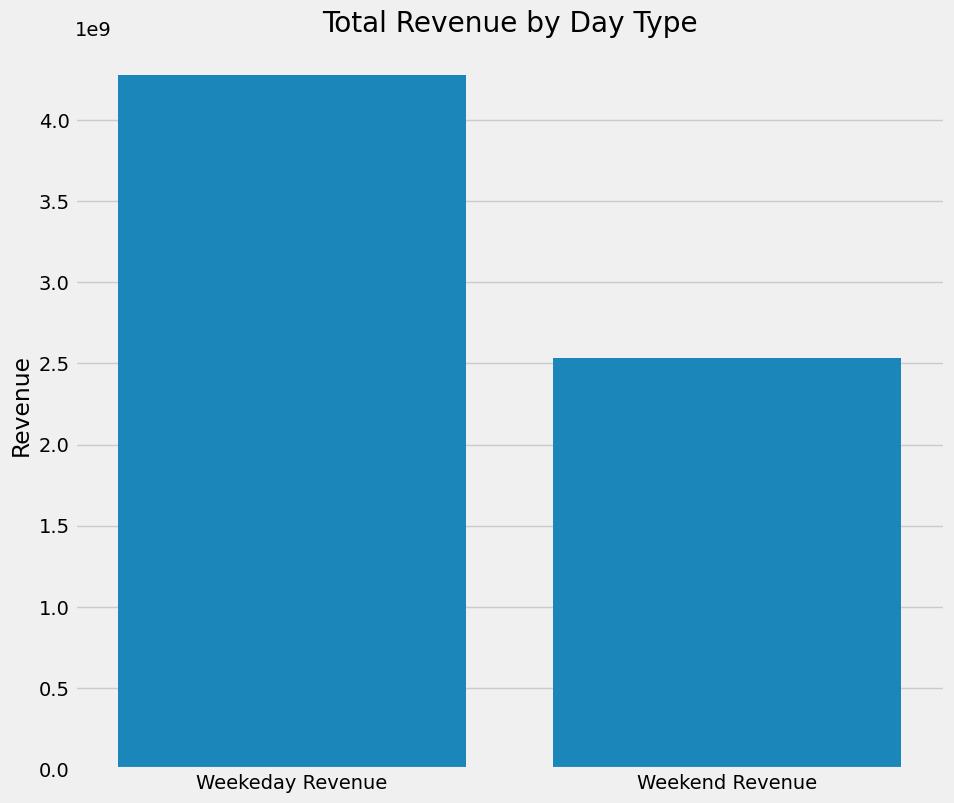

In [22]:
weekeday_revenue = df[df['day_type'] == 'weekeday']['revenue_realized'].sum()
weekend_revenue = df[df['day_type'] == 'weekend']['revenue_realized'].sum()

plt.figure(figsize=(10, 9))
sns.barplot(x=['Weekeday Revenue', 'Weekend Revenue'], y=[weekeday_revenue, weekend_revenue])
plt.ylabel('Revenue')
plt.title('Total Revenue by Day Type')
plt.show()

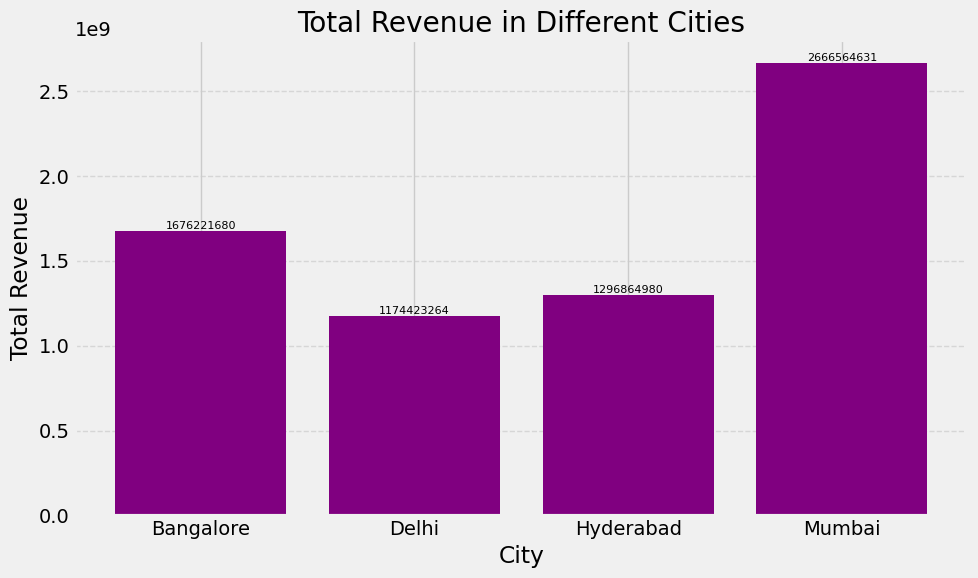

In [23]:
revenue_by_city = df.groupby('city')['revenue_realized'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_city.index, revenue_by_city.values, color='purple')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=8)

plt.title('Total Revenue in Different Cities')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

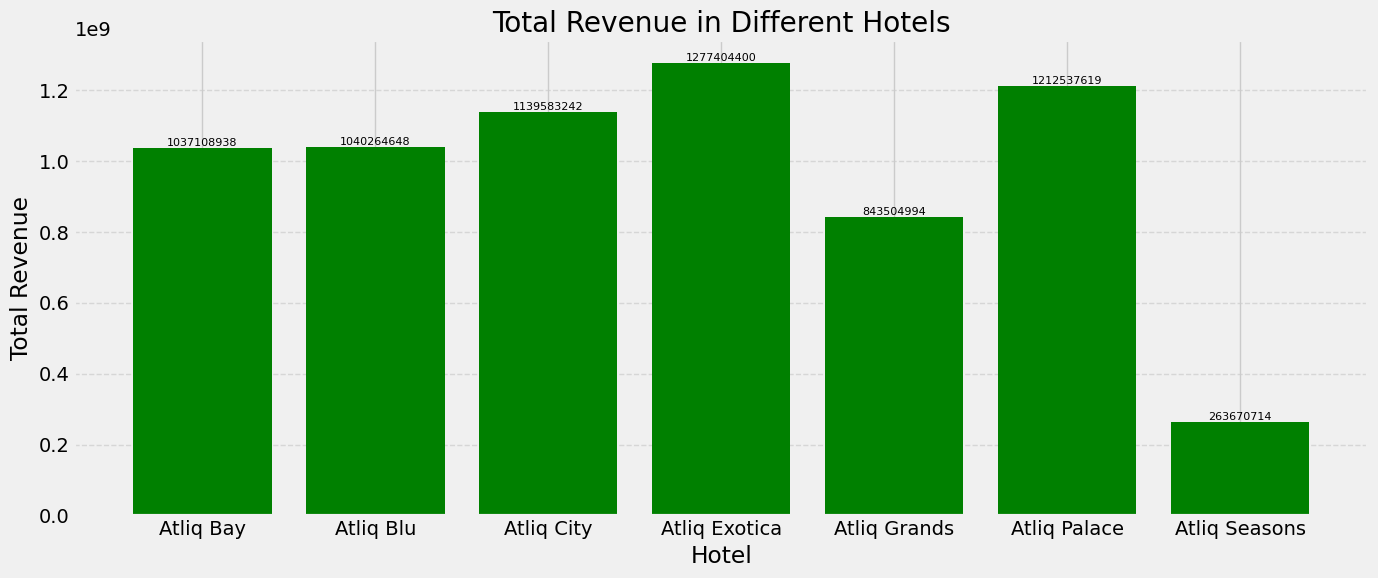

In [24]:
revenue_by_city = df.groupby('property_name')['revenue_realized'].sum()

plt.figure(figsize=(14, 6))
bars = plt.bar(revenue_by_city.index, revenue_by_city.values, color='green')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=8)

plt.title('Total Revenue in Different Hotels')
plt.xlabel('Hotel')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

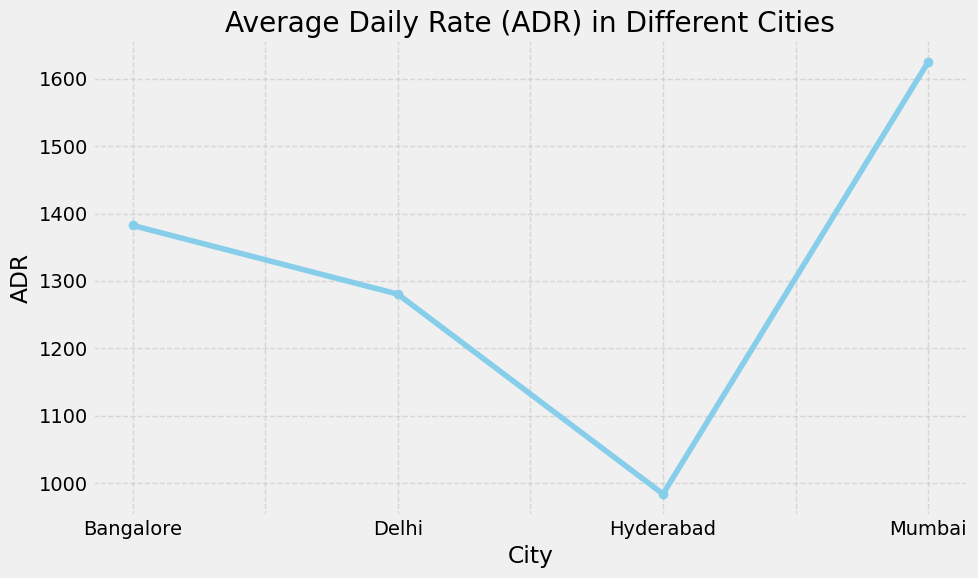

In [25]:
df['ADR'] = df['revenue_realized'] / df['successful_bookings']

ADR_by_city = df.groupby('city')['ADR'].mean()

# Plotting
plt.figure(figsize=(10, 6))
ADR_by_city.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Daily Rate (ADR) in Different Cities')
plt.xlabel('City')
plt.ylabel('ADR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

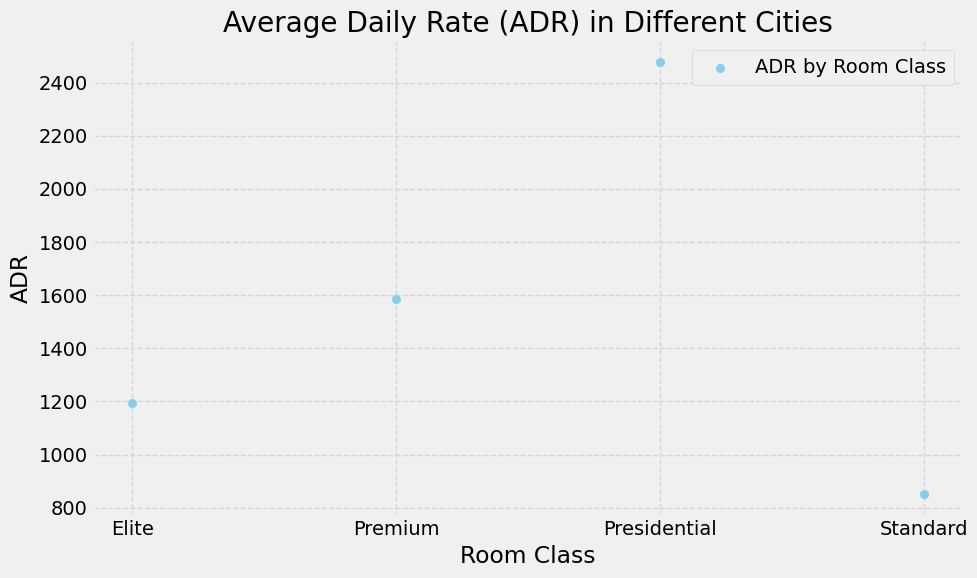

In [26]:
df['ADR'] = df['revenue_realized'] / df['successful_bookings']

ADR_by_room_class = df.groupby('room_class')['ADR'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(ADR_by_room_class.index, ADR_by_room_class.values, color='skyblue', label='ADR by Room Class', marker='o')
plt.title('Average Daily Rate (ADR) in Different Cities')
plt.xlabel('Room Class')
plt.ylabel('ADR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
df['ADR'] = df['revenue_realized'] / df['successful_bookings']
df['ADR']

0          400.400000
1          130.000000
2          395.652174
3          280.000000
4          606.666667
             ...     
536704     807.500000
536705    1076.666667
536706     799.809524
536707     897.222222
536708    1196.296296
Name: ADR, Length: 536709, dtype: float64

In [28]:
df['ADR'] = df['revenue_realized'] / df['successful_bookings']

adr_mean = df['ADR'].mean()

print("Mean ADR:", adr_mean)

Mean ADR: 1339.0293772378996


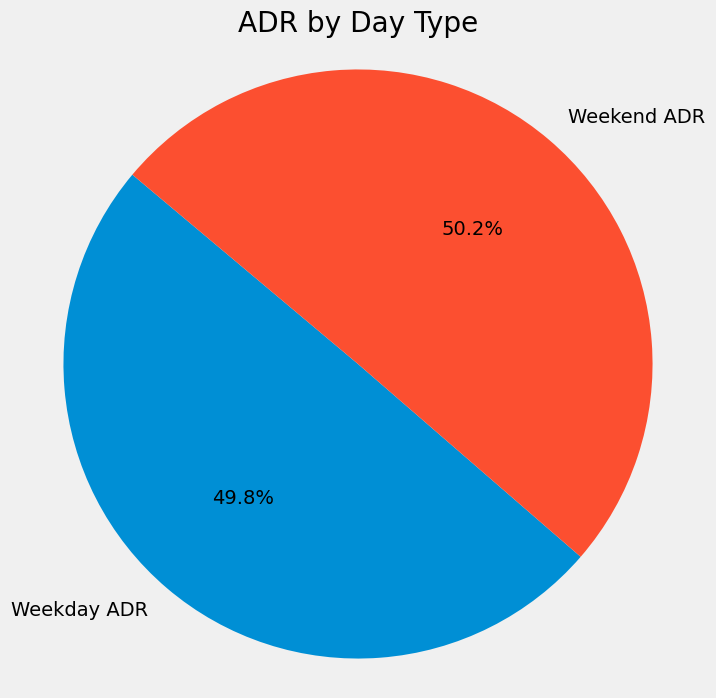

In [29]:
weekeday_ADR = df[df['day_type'] == 'weekeday']['ADR'].mean() 
weekend_ADR = df[df['day_type'] == 'weekend']['ADR'].mean()  

labels = ['Weekday ADR', 'Weekend ADR']
sizes = [weekeday_ADR, weekend_ADR]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('ADR by Day Type')
plt.show()

<Figure size 1200x800 with 0 Axes>

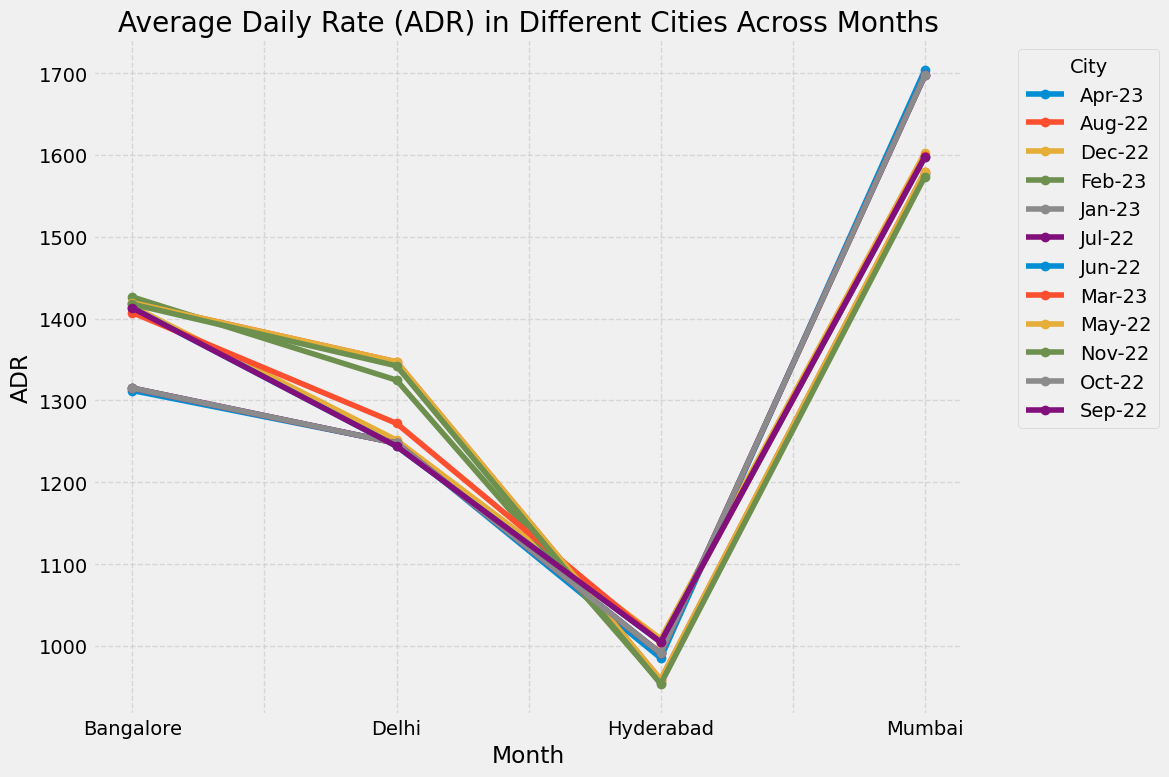

In [30]:
df['ADR'] = df['revenue_realized'] / df['successful_bookings']
adr_by_city_month = df.groupby(['city', 'mmm yy'])['ADR'].mean()

plt.figure(figsize=(12, 8))
adr_by_city_month.unstack().plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Average Daily Rate (ADR) in Different Cities Across Months')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

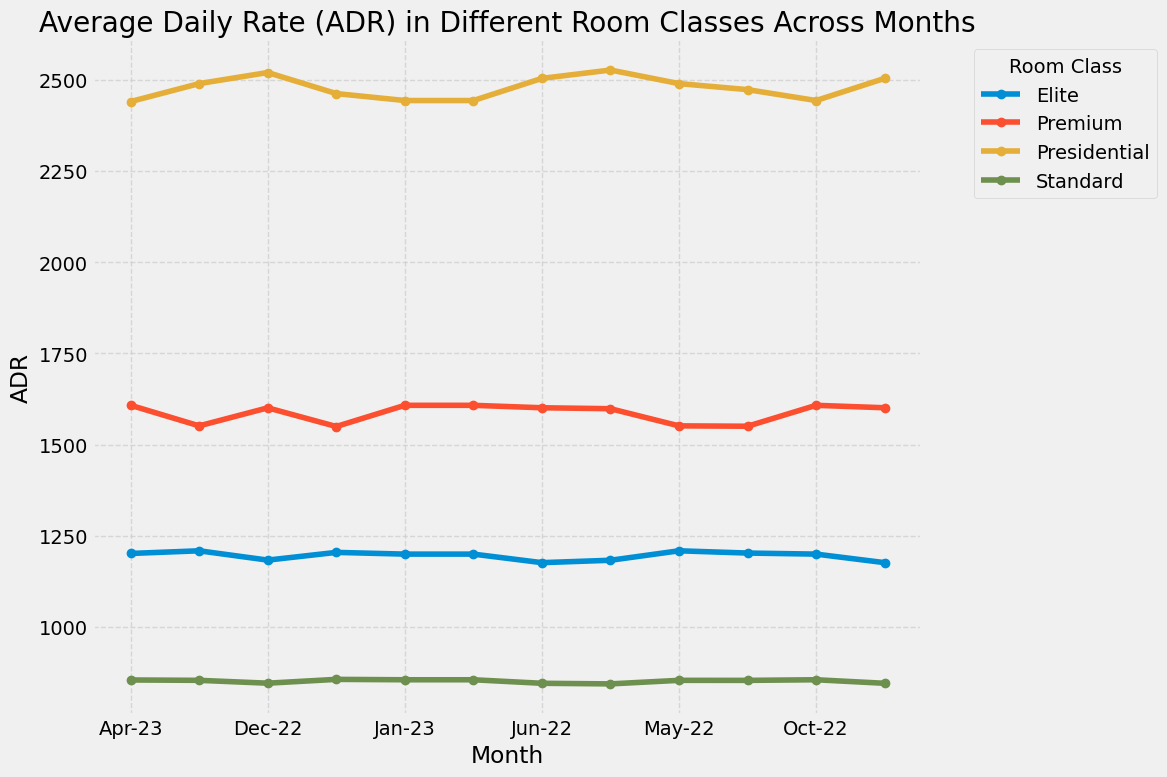

In [31]:
adr_by_room_month = df.groupby(['mmm yy', 'room_class'])['ADR'].mean()

# Plot the graph
plt.figure(figsize=(15, 8))
adr_by_room_month.unstack().plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Average Daily Rate (ADR) in Different Room Classes Across Months')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Room Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
df['RevPAR'] = df['revenue_generated'] / df['capacity']
df['RevPAR']

0          333.666667
1          303.333333
2          303.333333
3          478.947368
4          574.736842
             ...     
536704     787.804878
536705     787.804878
536706    1076.666667
536707     828.205128
536708     950.000000
Name: RevPAR, Length: 536709, dtype: float64

In [33]:
df['RevPAR'] = df['revenue_generated'] / df['capacity']
df['RevPAR']

RevPAR_mean = df['RevPAR'].mean()

print("Mean RevPAR:", RevPAR_mean)

Mean RevPAR: 867.7708383820122


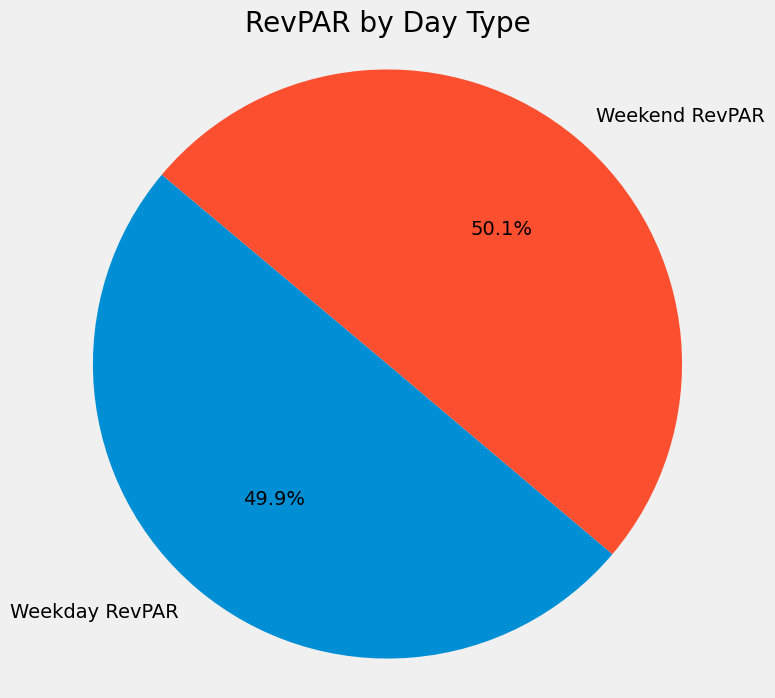

In [34]:
weekeday_RevPAR = df[df['day_type'] == 'weekeday']['RevPAR'].mean() 
weekend_RevPAR = df[df['day_type'] == 'weekend']['RevPAR'].mean()  

labels = ['Weekday RevPAR', 'Weekend RevPAR']
sizes = [weekeday_RevPAR, weekend_RevPAR]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('RevPAR by Day Type')
plt.show()

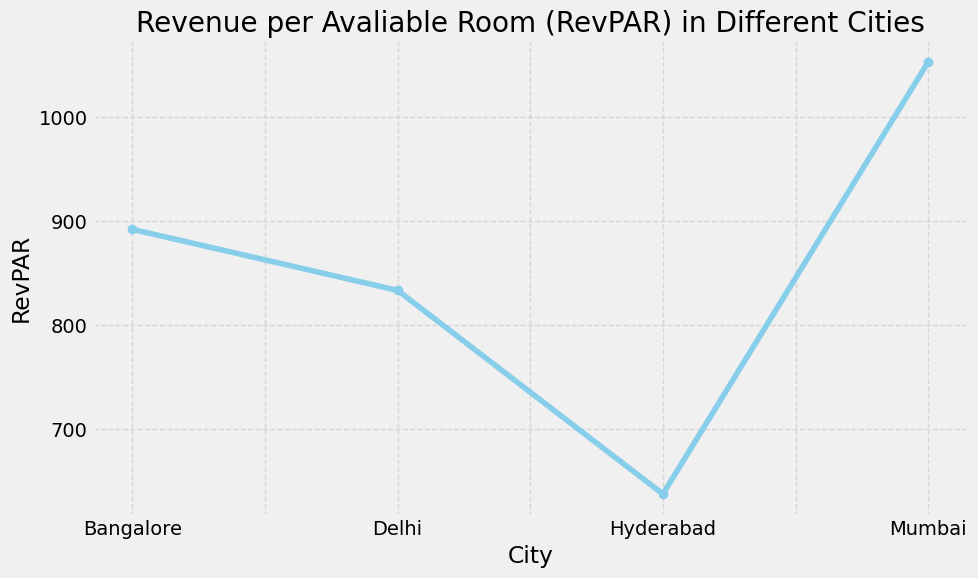

In [35]:
df['RevPAR'] = df['revenue_generated'] / df['capacity']

RevPAR_by_city = df.groupby('city')['RevPAR'].mean()

# Plotting
plt.figure(figsize=(10, 6))
RevPAR_by_city.plot(kind='line', marker='o', color='skyblue')
plt.title('Revenue per Avaliable Room (RevPAR) in Different Cities')
plt.xlabel('City')
plt.ylabel('RevPAR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

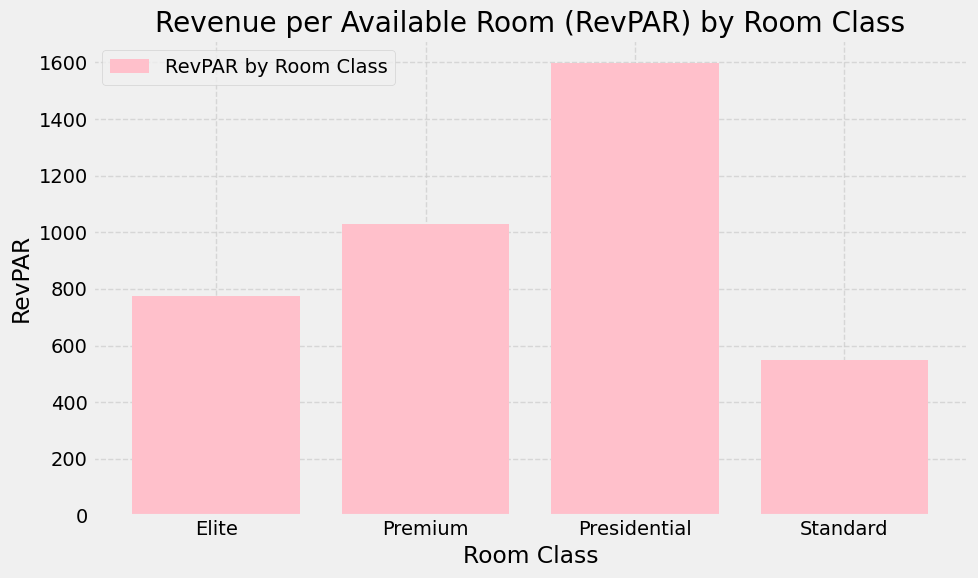

In [36]:
df['RevPAR'] = df['revenue_generated'] / df['capacity']

RevPAR_by_room_class = df.groupby('room_class')['RevPAR'].mean()

plt.figure(figsize=(10, 6))
plt.bar(RevPAR_by_room_class.index, RevPAR_by_room_class.values, color='pink', label='RevPAR by Room Class')
plt.title('Revenue per Available Room (RevPAR) by Room Class')
plt.xlabel('Room Class')
plt.ylabel('RevPAR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

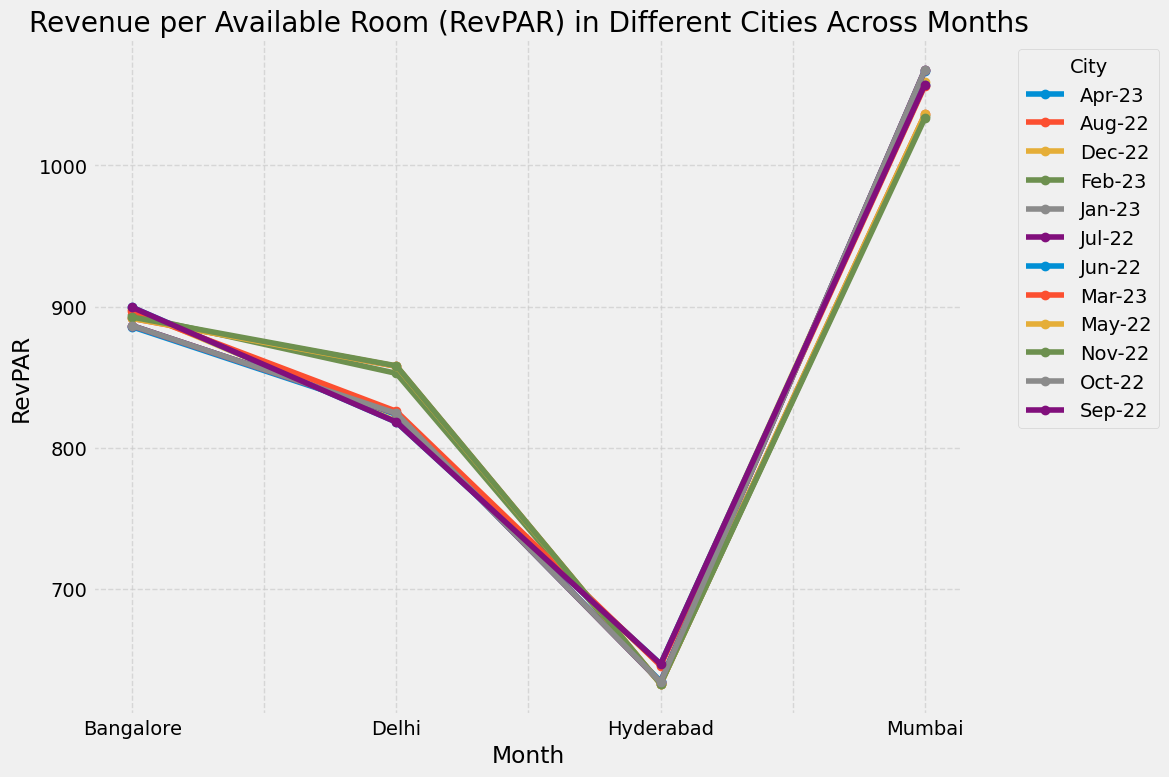

In [37]:
df['RevPAR'] = df['revenue_generated'] / df['capacity']

RevPAR_by_city_month = df.groupby(['city', 'mmm yy'])['RevPAR'].mean()

# Plotting
plt.figure(figsize=(12, 8))
RevPAR_by_city_month.unstack().plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Revenue per Available Room (RevPAR) in Different Cities Across Months')
plt.xlabel('Month')
plt.ylabel('RevPAR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

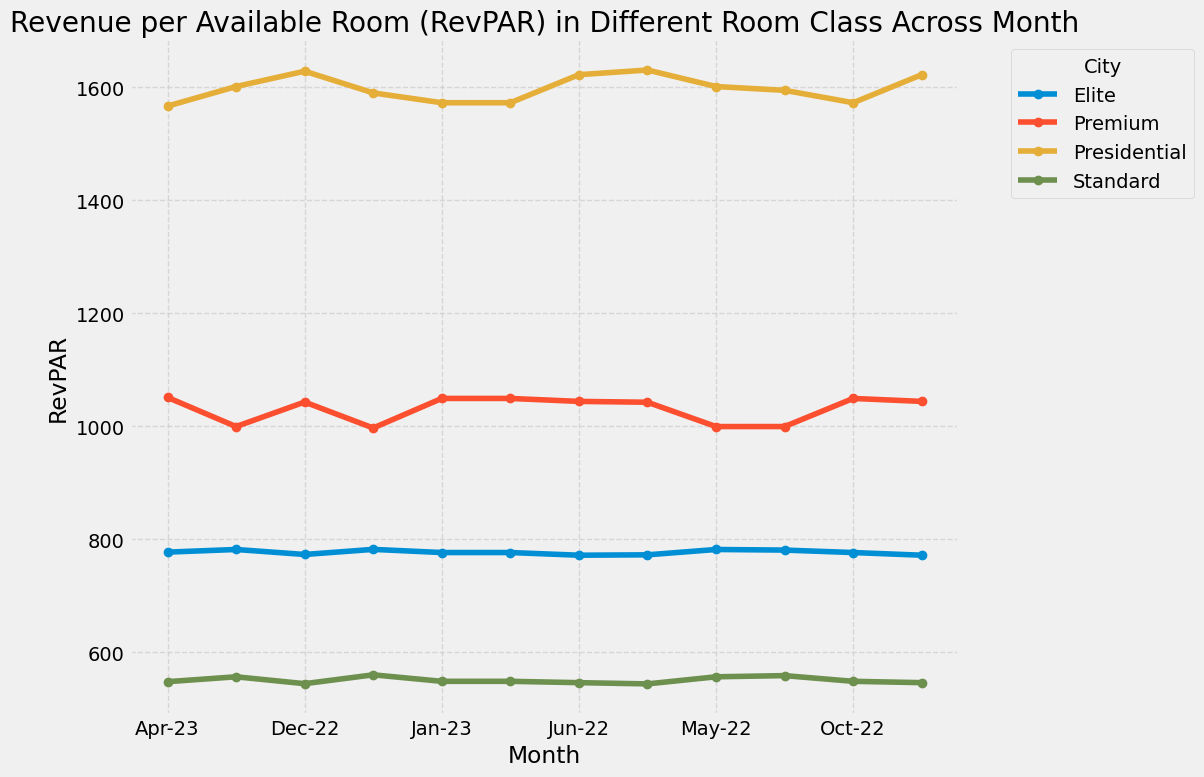

In [38]:
df['RevPAR'] = df['revenue_generated'] / df['capacity']
RevPAR_by_room_month = df.groupby(['mmm yy', 'room_class'])['RevPAR'].mean()

plt.figure(figsize=(15, 8))
RevPAR_by_room_month.unstack().plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Revenue per Available Room (RevPAR) in Different Room Class Across Month')
plt.xlabel('Month')
plt.ylabel('RevPAR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
df['Occupancy %'] = df['successful_bookings'] / df['capacity'] * 100
df['Occupancy %']

0         83.333333
1         93.333333
2         76.666667
3         68.421053
4         94.736842
            ...    
536704    97.560976
536705    73.170732
536706    53.846154
536707    92.307692
536708    79.411765
Name: Occupancy %, Length: 536709, dtype: float64

In [40]:
df['Occupancy %'] = df['successful_bookings'] / df['capacity'] * 100
df['Occupancy %']

occupancy_mean = df['Occupancy %'].mean()

print("Mean Occupancy %:", occupancy_mean)

Mean Occupancy %: 58.32113936972173


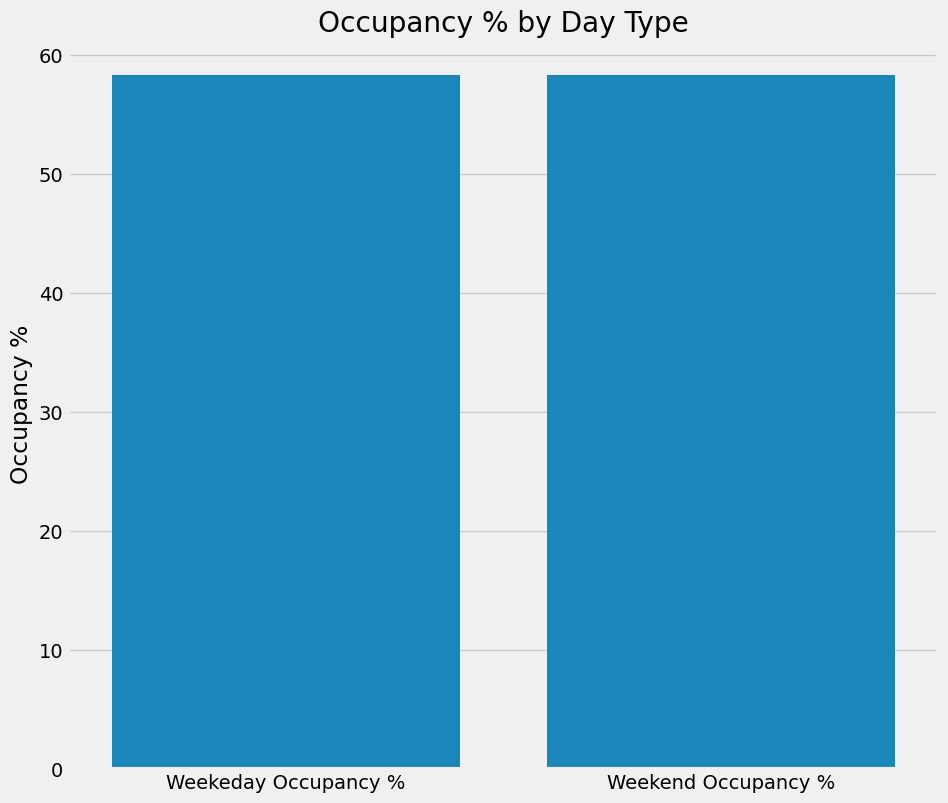

In [41]:
weekeday_Occupancy = df[df['day_type'] == 'weekeday']['Occupancy %'].mean()  # Calculate mean occupancy
weekend_Occupancy = df[df['day_type'] == 'weekend']['Occupancy %'].mean()  # Calculate mean occupancy

plt.figure(figsize=(10, 9))
sns.barplot(x=['Weekeday Occupancy %', 'Weekend Occupancy %'], y=[weekeday_Occupancy, weekend_Occupancy])
plt.ylabel('Occupancy %')  # Change ylabel to 'Occupancy %'
plt.title('Occupancy % by Day Type')
plt.show()

In [42]:
avg_Occupancy = (weekeday_Occupancy + weekend_Occupancy)/2

print("Weekday Occupancy %:", weekeday_Occupancy)
print("Weekend Occupancy %:", weekend_Occupancy)
print("Avg Occupancy %:", avg_Occupancy)

Weekday Occupancy %: 58.31914589613017
Weekend Occupancy %: 58.32451563559106
Avg Occupancy %: 58.32183076586062


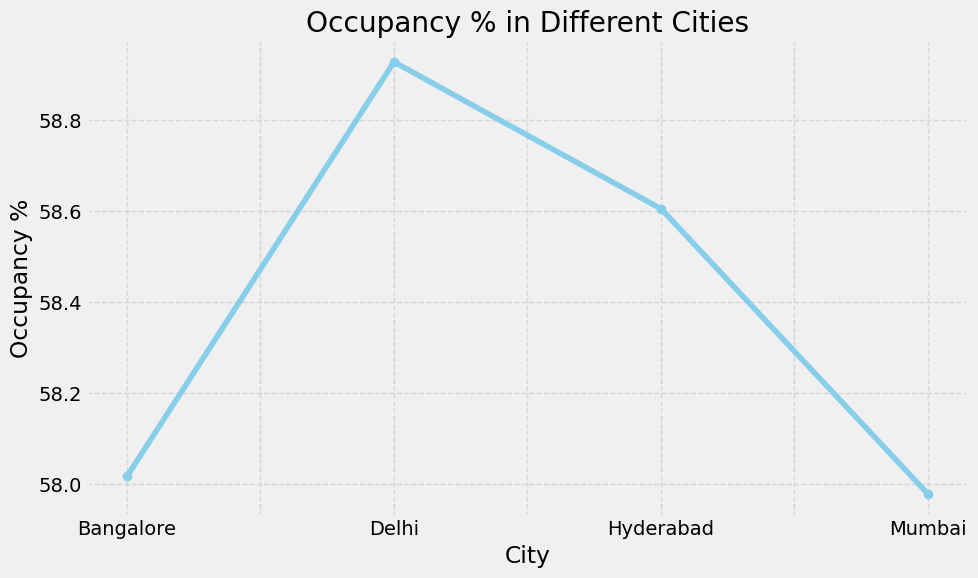

In [43]:
df['Occupancy %'] = df['successful_bookings'] / df['capacity'] * 100

Occupancy_by_city = df.groupby('city')['Occupancy %'].mean()

plt.figure(figsize=(10, 6))
Occupancy_by_city.plot(kind='line', marker='o', color='skyblue')
plt.title('Occupancy % in Different Cities')
plt.xlabel('City')
plt.ylabel('Occupancy %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

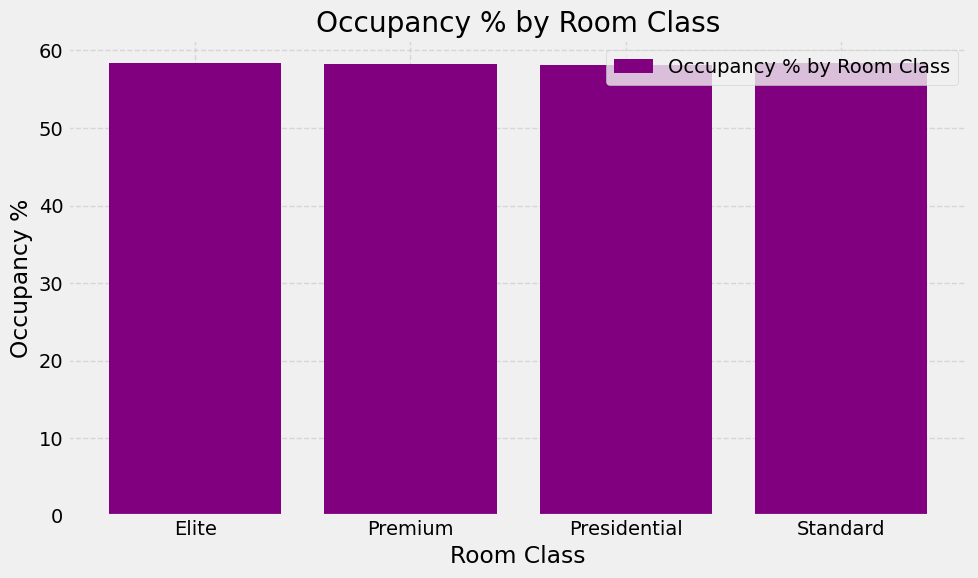

In [44]:
df['Occupancy %'] = df['successful_bookings'] / df['capacity'] * 100

Occupancy_by_room_class = df.groupby('room_class')['Occupancy %'].mean()

plt.figure(figsize=(10, 6))
plt.bar(Occupancy_by_room_class.index, Occupancy_by_room_class.values, color='purple', label='Occupancy % by Room Class')
plt.title('Occupancy % by Room Class')
plt.xlabel('Room Class')
plt.ylabel('Occupancy %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
df['Occupancy %'] = df['successful_bookings'] / df['capacity'] * 100
occupancy_mean_by_room_class = df.groupby('room_class')['Occupancy %'].mean()
print("Mean Occupancy Percentage by Room Class:")
print(occupancy_mean_by_room_class)

Mean Occupancy Percentage by Room Class:
room_class
Elite           58.391872
Premium         58.242839
Presidential    58.150561
Standard        58.363618
Name: Occupancy %, dtype: float64


<Figure size 1200x800 with 0 Axes>

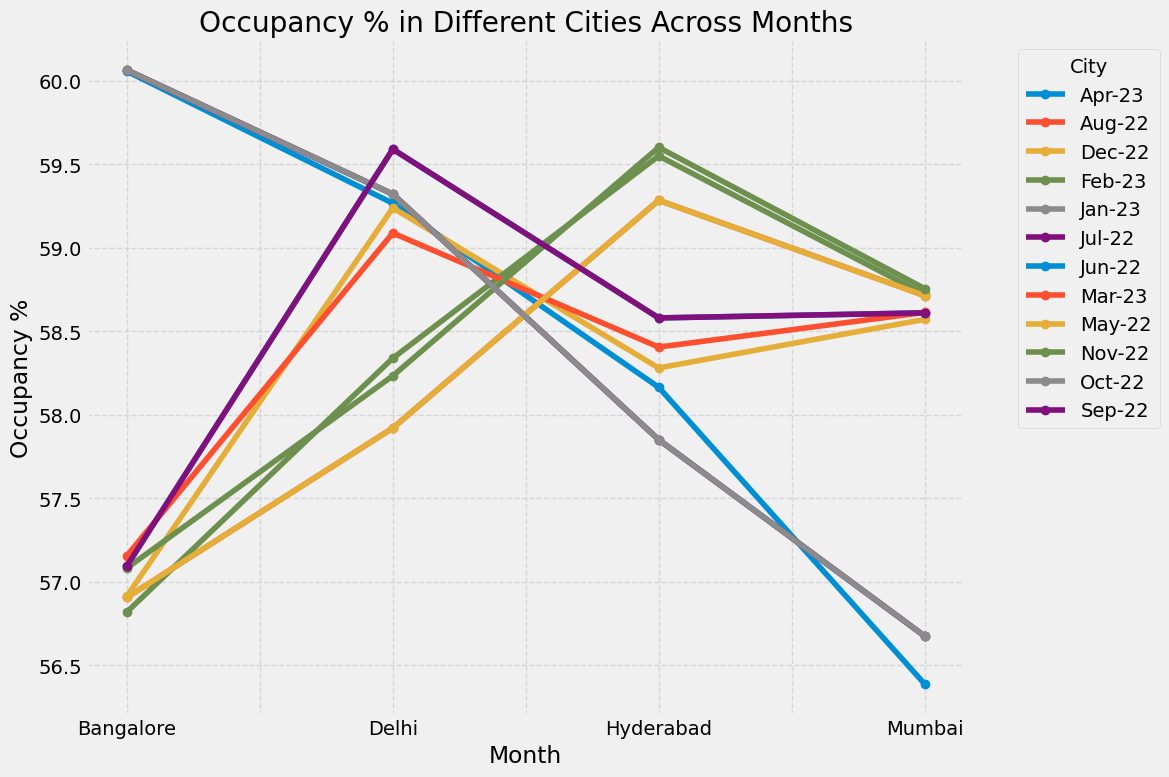

In [46]:
df['Occupancy %'] = df['successful_bookings'] / df['capacity'] * 100

Occupancy_by_city_month = df.groupby(['city', 'mmm yy'])['Occupancy %'].mean()

plt.figure(figsize=(12, 8))
Occupancy_by_city_month.unstack().plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Occupancy % in Different Cities Across Months')
plt.xlabel('Month')
plt.ylabel('Occupancy %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

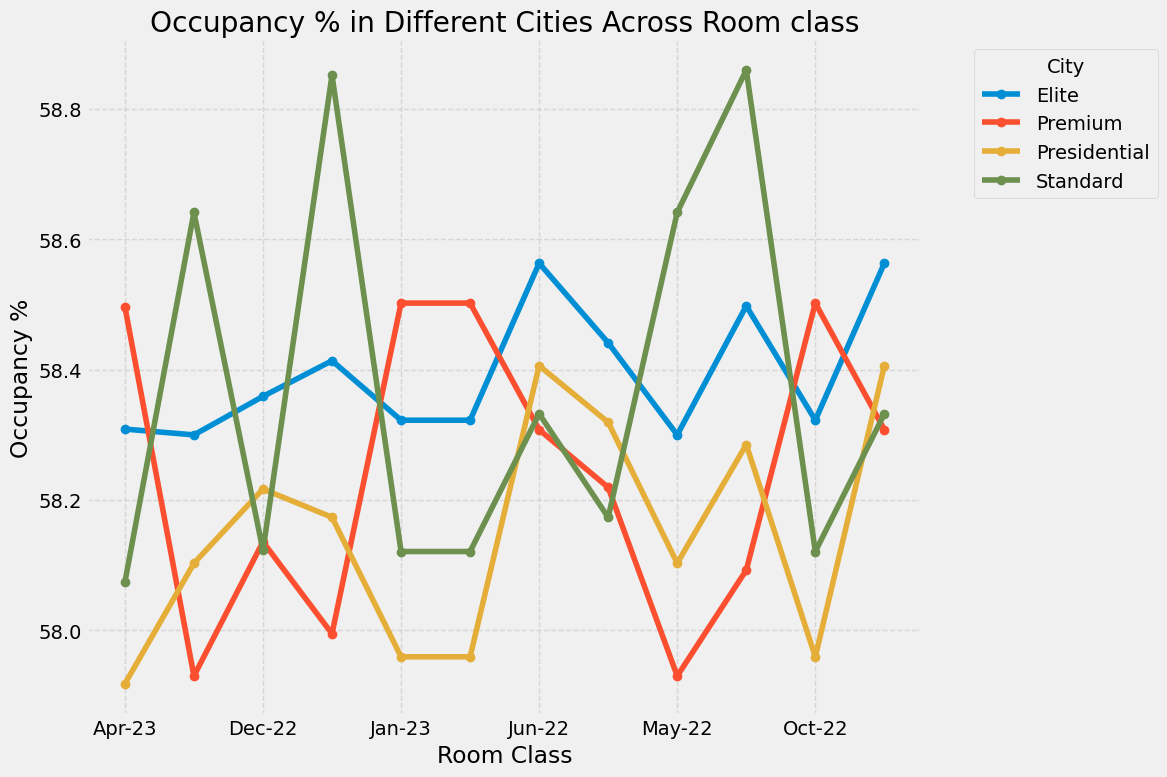

In [47]:
df['Occupancy %'] = df['successful_bookings'] / df['capacity'] * 100

Occupancy_by_room_month = df.groupby(['mmm yy', 'room_class'])['Occupancy %'].mean()

plt.figure(figsize=(15, 8))
Occupancy_by_room_month.unstack().plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Occupancy % in Different Cities Across Room class')
plt.xlabel('Room Class')
plt.ylabel('Occupancy %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
total_bookings_all_classes = df['successful_bookings'].sum()

# Calculate Total Bookings for each room class
total_bookings_by_class = df.groupby('room_class')['successful_bookings'].sum()

df['Booking % by Room class'] = df.apply(lambda row: (row['successful_bookings'] / total_bookings_all_classes) * 100, axis=1)

print(df[['room_class', 'Booking % by Room class']])

          room_class  Booking % by Room class
0           Standard                 0.000318
1           Standard                 0.000357
2           Standard                 0.000293
3           Standard                 0.000166
4           Standard                 0.000229
...              ...                      ...
536704  Presidential                 0.000509
536705  Presidential                 0.000382
536706  Presidential                 0.000267
536707  Presidential                 0.000458
536708  Presidential                 0.000344

[536709 rows x 2 columns]


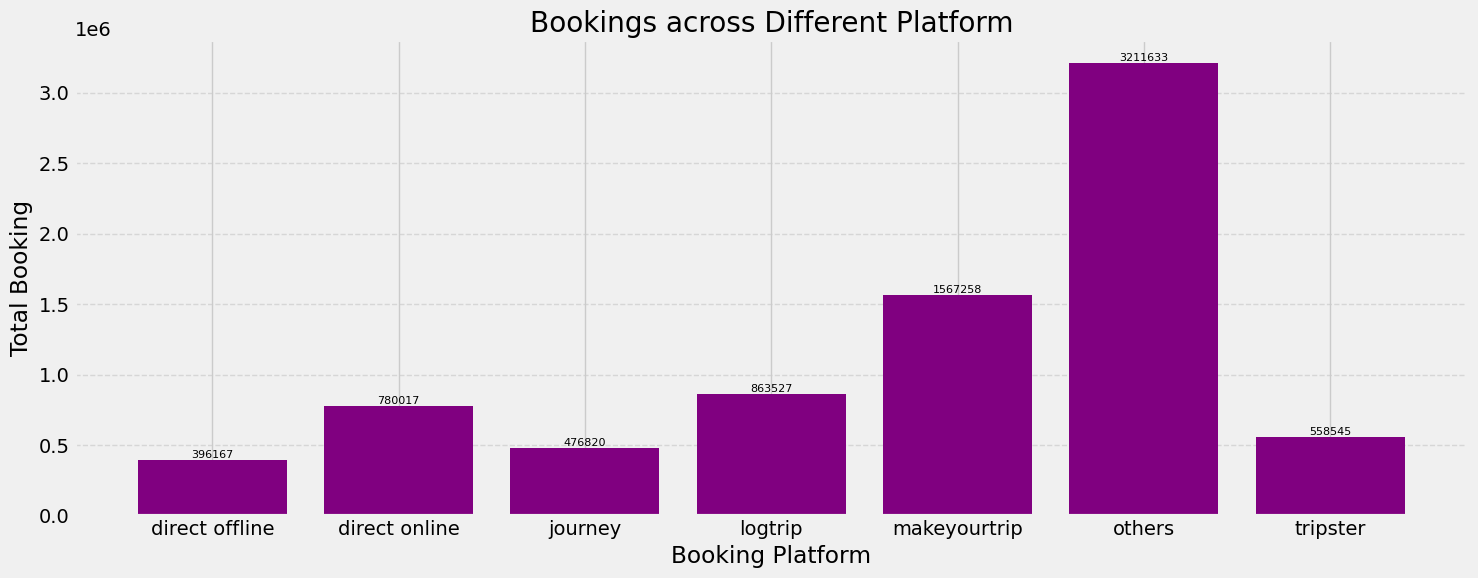

In [49]:
booking_by_platform = df.groupby('booking_platform')['successful_bookings'].sum()

plt.figure(figsize=(15, 6))
bars = plt.bar(booking_by_platform.index, booking_by_platform.values, color='purple')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=8)

plt.title('Bookings across Different Platform')
plt.xlabel('Booking Platform')
plt.ylabel('Total Booking')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
numeric_columns = df.select_dtypes(include=['number'])
correlation = numeric_columns.corr()['revenue_realized'].abs().sort_values(ascending=False)
print(correlation)

revenue_realized           1.000000
revenue_generated          0.794245
ADR                        0.433473
RevPAR                     0.300191
no_guests                  0.170624
Occupancy %                0.010446
capacity                   0.004330
Booking % by Room class    0.002668
successful_bookings        0.002668
Name: revenue_realized, dtype: float64


In [51]:
df.head()

,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,day_type,room_class,successful_bookings,capacity,ADR,RevPAR,Occupancy %,Booking % by Room class
0,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,25,30,400.400000,333.666667,83.333333,0.000318
1,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,28,30,130.000000,303.333333,93.333333,0.000357
2,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,23,30,395.652174,303.333333,76.666667,0.000293
3,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,13,19,280.000000,478.947368,68.421053,0.000166
4,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,18,19,606.666667,574.736842,94.736842,0.000229


In [52]:
df.shape

(536709, 22)

In [53]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['booking_date',
 'check_in_date',
 'checkout_date',
 'room_category',
 'booking_platform',
 'booking_status',
 'property_name',
 'category',
 'city',
 'date',
 'mmm yy',
 'day_type',
 'room_class']

In [54]:
cat_df = df[cat_cols]
cat_df.head()

,booking_date,check_in_date,checkout_date,room_category,booking_platform,booking_status,property_name,category,city,date,mmm yy,day_type,room_class
0,27-04-2022,01-05-2022,02-05-2022,RT1,direct online,Checked Out,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard
1,30-04-2022,01-05-2022,02-05-2022,RT1,others,Cancelled,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard
2,28-04-2022,01-05-2022,04-05-2022,RT1,logtrip,Checked Out,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard
3,28-04-2022,01-05-2022,02-05-2022,RT1,others,Cancelled,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard
4,27-04-2022,01-05-2022,02-05-2022,RT1,direct online,Checked Out,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard


In [55]:
cat_df.drop(['booking_date', 'check_in_date', 'checkout_date', 'date', 'mmm yy'] , axis = 1, inplace = True)

In [56]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

room_category: 
['RT1' 'RT2' 'RT3' 'RT4']

booking_platform: 
['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']

booking_status: 
['Checked Out' 'Cancelled' 'No Show']

property_name: 
['Atliq Grands' 'Atliq Exotica' 'Atliq City' 'Atliq Blu' 'Atliq Bay'
 'Atliq Palace' 'Atliq Seasons']

category: 
['Luxury' 'Business']

city: 
['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']

day_type: 
['weekend' 'weekeday']

room_class: 
['Standard' 'Elite' 'Premium' 'Presidential']



In [57]:
cat_df['room_category'] = cat_df['room_category'].map({'RT1' : 0, 'RT2' : 1, 'RT3' : 2, 'RT4' : 3})

cat_df['booking_platform'] = cat_df['booking_platform'].map({'direct online' : 0, 'others': 1, 'logtrip': 2, 'tripster': 3, 'makeyourtrip': 4, 
                                                             'journey': 5, 'direct offline': 6})

cat_df['booking_status'] = cat_df['booking_status'].map({'Checked Out': 0, 'Cancelled': 1, 'No Show': 2})

cat_df['property_name'] = cat_df['property_name'].map({'Atliq Grands': 0, 'Atliq Exotica': 1, 'Atliq City': 2, 'Atliq Blu': 3,
                                                           'Atliq Bay': 4, 'Atliq Palace': 5, 'Atliq Seasons': 6})

cat_df['category'] = cat_df['category'].map({'Luxury': 0, 'Business': 1})

cat_df['city'] = cat_df['city'].map({'Delhi': 0, 'Mumbai': 1, 'Hyderabad': 2, 'Bangalore': 3})

cat_df['day_type'] = cat_df['day_type'].map({'weekend': 0, 'weekeday': 1})

cat_df['room_class'] = cat_df['room_class'].map({'Standard': 0, 'Elite': 1, 'Premium': 2, 'Presidential': 3})

In [58]:
cat_df.head()

,room_category,booking_platform,booking_status,property_name,category,city,day_type,room_class
0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0
2,0,2,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [59]:
num_df = df.drop(columns=cat_cols)
num_df.drop(columns=['revenue_realized', 'Booking % by Room class'], inplace=True)
num_df

,no_guests,revenue_generated,successful_bookings,capacity,ADR,RevPAR,Occupancy %
0,3,10010,25,30,400.400000,333.666667,83.333333
1,2,9100,28,30,130.000000,303.333333,93.333333
2,2,9100,23,30,395.652174,303.333333,76.666667
3,2,9100,13,19,280.000000,478.947368,68.421053
4,4,10920,18,19,606.666667,574.736842,94.736842
...,...,...,...,...,...,...,...
536704,1,32300,40,41,807.500000,787.804878,97.560976
536705,1,32300,30,41,1076.666667,787.804878,73.170732
536706,5,41990,21,39,799.809524,1076.666667,53.846154
536707,1,32300,36,39,897.222222,828.205128,92.307692


In [60]:
num_df.var()

no_guests              1.064403e+00
revenue_generated      4.163352e+07
successful_bookings    5.766367e+01
capacity               1.308771e+02
ADR                    2.816700e+06
RevPAR                 9.596366e+05
Occupancy %            2.332339e+02
dtype: float64

In [61]:
num_df.head()

,no_guests,revenue_generated,successful_bookings,capacity,ADR,RevPAR,Occupancy %
0,3,10010,25,30,400.400000,333.666667,83.333333
1,2,9100,28,30,130.000000,303.333333,93.333333
2,2,9100,23,30,395.652174,303.333333,76.666667
3,2,9100,13,19,280.000000,478.947368,68.421053
4,4,10920,18,19,606.666667,574.736842,94.736842


In [62]:
cat_df.isnull().sum()

room_category       0
booking_platform    0
booking_status      0
property_name       0
category            0
city                0
day_type            0
room_class          0
dtype: int64

In [63]:
num_df.isnull().sum()

no_guests              0
revenue_generated      0
successful_bookings    0
capacity               0
ADR                    0
RevPAR                 0
Occupancy %            0
dtype: int64

In [64]:
cat_df.head()

,room_category,booking_platform,booking_status,property_name,category,city,day_type,room_class
0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0
2,0,2,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [65]:
cat_df.drop(['booking_status', 'booking_platform', 'day_type'] , axis = 1, inplace = True)

In [66]:
cat_df.head()

,room_category,property_name,category,city,room_class
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [67]:
X = pd.concat([cat_df, num_df], axis=1)

X.to_csv('C:\\Users\\ameya\\Downloads\\hotel revenue analysis.csv', index=False)

In [68]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['revenue_realized']

In [69]:
X.shape, y.shape

((536709, 12), (536709,))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [71]:
X_train.head()

,room_category,property_name,category,city,room_class,no_guests,revenue_generated,successful_bookings,capacity,ADR,RevPAR,Occupancy %
406205,2,1,0,1,2,2,20400,20,41,1020.000000,497.560976,48.780488
208925,2,2,1,3,2,4,21600,29,41,744.827586,526.829268,70.731707
529673,1,1,0,1,1,2,15300,20,30,306.000000,510.000000,66.666667
282242,2,1,0,1,2,3,22440,13,25,1726.153846,897.600000,52.000000
410574,1,5,1,1,1,2,15300,9,19,1700.000000,805.263158,47.368421


In [72]:
X_test.head()

,room_category,property_name,category,city,room_class,no_guests,revenue_generated,successful_bookings,capacity,ADR,RevPAR,Occupancy %
185697,2,1,0,1,2,2,20400,14,40,1457.142857,510.000000,35.000000
16371,0,5,1,1,0,2,11050,11,19,1004.545455,581.578947,57.894737
306573,3,4,0,0,3,4,31920,11,18,2901.818182,1773.333333,61.111111
57559,1,0,0,1,1,3,16830,15,24,1122.000000,701.250000,62.500000
269018,1,4,0,3,1,2,13500,34,50,397.058824,270.000000,68.000000


In [73]:
y_train.head(), y_test.head()

(406205    20400
 208925    21600
 529673     6120
 282242    22440
 410574    15300
 Name: revenue_realized, dtype: int64,
 185697    20400
 16371     11050
 306573    31920
 57559     16830
 269018    13500
 Name: revenue_realized, dtype: int64)

# MODEL BUILDING

# Cat Boost Classifier

In [74]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 9.1587415	total: 13.2s	remaining: 21m 45s
1:	learn: 482.4662654	total: 30.3s	remaining: 24m 45s
2:	learn: 905.7361141	total: 46.7s	remaining: 25m 10s
3:	learn: 849.6363466	total: 1m 1s	remaining: 24m 41s
4:	learn: 693.0910287	total: 1m 15s	remaining: 23m 56s
5:	learn: 533.3284344	total: 1m 32s	remaining: 24m 14s
6:	learn: 414.0837272	total: 1m 48s	remaining: 24m 6s
7:	learn: 426.1379992	total: 2m 6s	remaining: 24m 15s
8:	learn: 437.6917187	total: 2m 25s	remaining: 24m 28s
9:	learn: 309.0406749	total: 2m 42s	remaining: 24m 25s
10:	learn: 339.1832570	total: 2m 59s	remaining: 24m 13s
11:	learn: 297.6365202	total: 3m 15s	remaining: 23m 50s
12:	learn: 329.3763815	total: 3m 28s	remaining: 23m 18s
13:	learn: 299.0306580	total: 3m 39s	remaining: 22m 30s
14:	learn: 331.5549961	total: 3m 55s	remaining: 22m 11s
15:	learn: 311.2677673	total: 4m 9s	remaining: 21m 51s
16:	learn: 281.9172889	total: 4m 27s	remaining: 21m 46s
17:	learn: 257.3693088	total: 4m 43s	remai

In [75]:
print(f"Accuracy Score of Cat Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Cat Boost Classifier is : 0.9809580592871383
Confusion Matrix : 
[[2280    0    0 ...    0    0    0]
 [   0  300    0 ...    0    0    0]
 [   0    0  216 ...    0    0    0]
 ...
 [   0    0    0 ...   65    0    0]
 [   0    0    0 ...    0  101   10]
 [   0    0    0 ...    0    7  152]]
Classification Report : 
              precision    recall  f1-score   support

        2600       0.98      0.98      0.98      2331
        2860       0.87      0.86      0.86       350
        3120       0.90      0.89      0.89       242
        3600       0.98      0.97      0.97      2747
        3640       0.94      0.97      0.95      1944
        3900       0.97      0.98      0.97      2202
        3960       0.89      0.92      0.91       395
        4004       0.82      0.82      0.82       227
        4290       0.93      0.89      0.91       366
        4320       0.96      0.84      0.90       288
        4368       0.99      0.92      0.96       222
        4420   

In [76]:
X = pd.concat([cat_df, num_df], axis=1)
X

,room_category,property_name,category,city,room_class,no_guests,revenue_generated,successful_bookings,capacity,ADR,RevPAR,Occupancy %
0,0,0,0,0,0,3,10010,25,30,400.400000,333.666667,83.333333
1,0,0,0,0,0,2,9100,28,30,130.000000,303.333333,93.333333
2,0,0,0,0,0,2,9100,23,30,395.652174,303.333333,76.666667
3,0,0,0,0,0,2,9100,13,19,280.000000,478.947368,68.421053
4,0,0,0,0,0,4,10920,18,19,606.666667,574.736842,94.736842
...,...,...,...,...,...,...,...,...,...,...,...,...
536704,3,6,1,1,3,1,32300,40,41,807.500000,787.804878,97.560976
536705,3,6,1,1,3,1,32300,30,41,1076.666667,787.804878,73.170732
536706,3,6,1,1,3,5,41990,21,39,799.809524,1076.666667,53.846154
536707,3,6,1,1,3,1,32300,36,39,897.222222,828.205128,92.307692


# ADD OUR OWN DATA

In [77]:
inp = np.array([0, 1, 1, 0, 0, 0, 4, 10920, 18, 19, 606.666667, 574.736842, 94.736842])

In [78]:
inp.shape

(13,)

In [79]:
cat.predict(inp)

array([5040], dtype=int64)

In [80]:
import pickle
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train) 

with open('CatBoostModel.pkl', 'wb') as f:
    pickle.dump(cat, f)

Learning rate set to 0.5
0:	learn: 9.1587415	total: 14.6s	remaining: 24m 5s
1:	learn: 482.4662654	total: 35.4s	remaining: 28m 52s
2:	learn: 905.7361141	total: 56.5s	remaining: 30m 25s
3:	learn: 849.6363466	total: 1m 15s	remaining: 30m 3s
4:	learn: 693.0910287	total: 1m 32s	remaining: 29m 19s
5:	learn: 533.3284344	total: 1m 50s	remaining: 28m 57s
6:	learn: 414.0837272	total: 2m 12s	remaining: 29m 15s
7:	learn: 426.1379992	total: 2m 31s	remaining: 28m 58s
8:	learn: 437.6917187	total: 2m 51s	remaining: 28m 54s
9:	learn: 309.0406749	total: 3m 14s	remaining: 29m 7s
10:	learn: 339.1832570	total: 3m 38s	remaining: 29m 27s
11:	learn: 297.6365202	total: 3m 58s	remaining: 29m 7s
12:	learn: 329.3763815	total: 4m 15s	remaining: 28m 30s
13:	learn: 299.0306580	total: 4m 27s	remaining: 27m 21s
14:	learn: 331.5549961	total: 4m 41s	remaining: 26m 37s
15:	learn: 311.2677673	total: 4m 57s	remaining: 26m 1s
16:	learn: 281.9172889	total: 5m 13s	remaining: 25m 28s
17:	learn: 257.3693088	total: 5m 27s	remain